In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train = df.copy(deep=True)
train.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [4]:
features_mapping = {
    'battery_power': 'battery_power',
    'blue': 'bluetooth',
    'clock_speed': 'clock_speed',
    'dual_sim': 'dual_sim',
    'fc': 'front_camera',
    'four_g': '4g',
    'int_memory': 'int_memory',
    'm_dep': 'mobile_depth',
    'mobile_wt': 'mobile_weight',
    'n_cores': 'number_of_cores',
    'pc': 'primary_camera_px',
    'px_height': 'pixel_resolution_height',
    'px_width': 'pixel_resolution_width',
    'ram': 'ram',
    'sc_h': 'screen_height',
    'sc_w': 'screen_width',
    'talk_time': 'talk_time',
    'three_g': '3g',
    'touch_screen': 'touch_screen',
    'wifi': 'wifi',
    'price_range': 'price_range'
}

In [5]:
train = train.rename(columns=features_mapping)
train.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,4g,int_memory,mobile_depth,mobile_weight,number_of_cores,...,pixel_resolution_height,pixel_resolution_width,ram,screen_height,screen_width,talk_time,3g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# features
X = train[train.columns[0:-1]]
# target
y = train[["price_range"]]

In [7]:
# Select how the model wwill perform in the future
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
import tensorflow as tf
from tensorflow import keras 

In [9]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(20,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(rate=0.3), 
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.3), 
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(rate=0.3), 
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(rate=0.3), 
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    

    return model

In [10]:
model = create_model()

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=45, batch_size=5, validation_split=0.05)

Epoch 1/45
266/266 [==============================] - 4s 3ms/step - loss: 1.2521 - accuracy: 0.3925 - val_loss: 0.8477 - val_accuracy: 0.5286
Epoch 2/45
266/266 [==============================] - 1s 3ms/step - loss: 0.8522 - accuracy: 0.5902 - val_loss: 0.6599 - val_accuracy: 0.6286
Epoch 3/45
266/266 [==============================] - 1s 3ms/step - loss: 0.7315 - accuracy: 0.6586 - val_loss: 0.5088 - val_accuracy: 0.7714
Epoch 4/45
266/266 [==============================] - 1s 3ms/step - loss: 0.5891 - accuracy: 0.7346 - val_loss: 0.4135 - val_accuracy: 0.8429
Epoch 5/45
266/266 [==============================] - 1s 3ms/step - loss: 0.5385 - accuracy: 0.7534 - val_loss: 0.2986 - val_accuracy: 0.9429
Epoch 6/45
266/266 [==============================] - 1s 3ms/step - loss: 0.4854 - accuracy: 0.8008 - val_loss: 0.2787 - val_accuracy: 0.8857
Epoch 7/45
266/266 [==============================] - 1s 3ms/step - loss: 0.4619 - accuracy: 0.8098 - val_loss: 0.3113 - val_accuracy: 0.8714
Epoch 

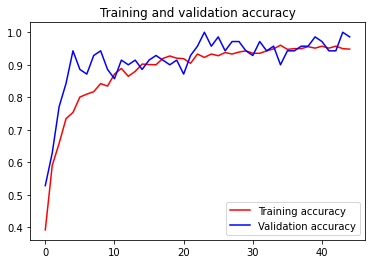

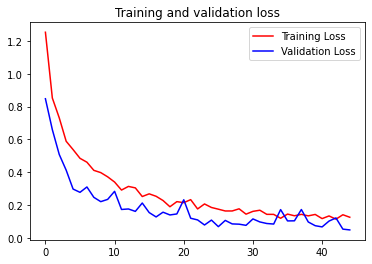

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Applying tf.data.Dataset

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [14]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 10

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(20,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', # use adaptive momentum
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])



In [16]:
history = model.fit(train_dataset, epochs=25)

Epoch 1/25
88/88 [==============================] - 1s 4ms/step - loss: 1.0911 - accuracy: 0.4921
Epoch 2/25
88/88 [==============================] - 0s 4ms/step - loss: 0.4017 - accuracy: 0.8400
Epoch 3/25
88/88 [==============================] - 0s 4ms/step - loss: 0.2225 - accuracy: 0.9200
Epoch 4/25
88/88 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9500
Epoch 5/25
88/88 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9679
Epoch 6/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9750
Epoch 7/25
88/88 [==============================] - 0s 3ms/step - loss: 0.0745 - accuracy: 0.9771
Epoch 8/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9771
Epoch 9/25
88/88 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9886
Epoch 10/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9771
Epoch 11/25
88/88 [

In [17]:
print("Train score:", model.evaluate(train_dataset))

88/88 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000
Train score: [0.003998796455562115, 1.0]


In [18]:
print("Train score:", model.evaluate(train_dataset))

88/88 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000
Train score: [0.00399879552423954, 1.0]


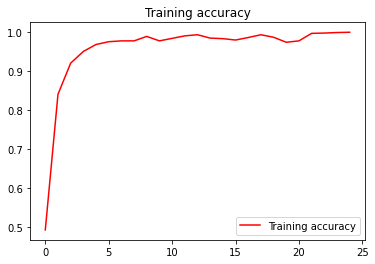

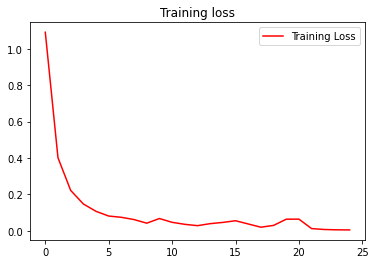

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']

loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.title('Training accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')

plt.title('Training loss')
plt.legend()

plt.show()